# Health Expectancy

In [1]:
from scipy.stats import pearsonr, ttest_1samp
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [2]:
df = sns.load_dataset("healthexp")
df.head()

Year        Country  Spending_USD  Life_Expectancy
0  1970        Germany       252.311             70.6
1  1970         France       192.143             72.2
2  1970  Great Britain       123.993             71.9
3  1970          Japan       150.437             72.0
4  1970            USA       326.961             70.9

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


#### **0. Variables discr√®tes et continues du dataset**

In [4]:
disc = ["Year", "Country"]
cont = ["Spending_USD", "Life_Expectancy"]

#### **1. `Spending_USD` et `Life_Expectancy` semblent √™tre corr√©l√©es**

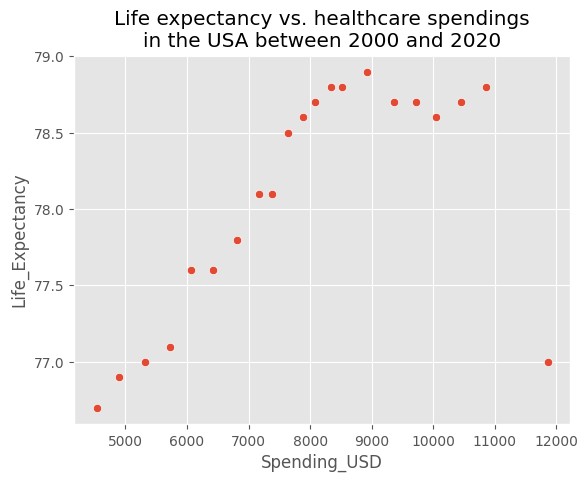

In [5]:
tmp_df_1 = df.query("`Year` >= 2000 & `Country` == 'USA'")
sns.scatterplot(data=tmp_df_1, x="Spending_USD", y="Life_Expectancy")
plt.title("Life expectancy vs. healthcare spendings\nin the USA between 2000 and 2020")
plt.show()

##### **1.1 Quelle est la corr√©lation de Pearson entre ces deux variables aux √âtats-Unis, de 2000 √† 2020 ?**

In [6]:
pearsonr(tmp_df_1["Spending_USD"], tmp_df_1["Life_Expectancy"])

PearsonRResult(statistic=np.float64(0.6210674528998252), pvalue=np.float64(0.0026581544805799064))

- `Spending_USD` et `Life_Expectancy` √©tant continues, nous utilison le test de corr√©lation Pearson.
- Le coefficient obtenu est environ √©gal √† 0,62.

##### **1.2 Quelle serait la probabilit√© d'obtenir une corr√©lation au moins aussi importante que celle-ci, si en r√©alit√© les deux variables n'√©taient pas corr√©l√©es ?**

- Posons H0 : "Les variables `Spending_USD` et `Life_Expectancy` ne sont pas correl√©es".
- Alors la probabilit√© d'obtenir une correlation ‚â• 0,621 (ou "assez n√©gative" car test bilat√©ral) sachant H0 est : p = 0,0027 (la p-valeur du test).
- Autrement dit, si les variables ne sont pas correl√©es, les chances d'obtenir une correlation ‚â• 0,621 sont infimes (de l'ordre de 0,27%).
- En calculant 1/p, on obtient 376. On conclut que si les variables ne sont pas correl√©es en r√©alit√©, alors on a 1 chance sur 376 d'obtenir le r√©sultat actuel.

#### **2. Il semblait √©galement que l'Allemagne et la Grande-Bretagne avaient la m√™me dur√©e de vie moyenne de 1970 √† 2020. Peut-on tester cela ?**

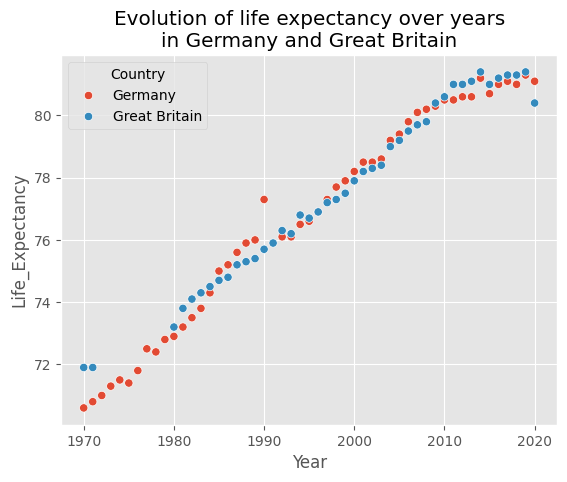

In [7]:
tmp_df_2 = df.query("Country in ['Germany', 'Great Britain']")
sns.scatterplot(data=tmp_df_2, x="Year", y="Life_Expectancy", hue="Country")
plt.title("Evolution of life expectancy over years\nin Germany and Great Britain")
plt.show()

- C'√©tait une question pi√®ge (et je me suis fait prendre hahaüòÜ) !
- On rel√®ve une ambiguit√© sur la question pos√©e :
  - S'agit-il de la moyenne des dur√©es de vie en Allemagne et en Grande-Bretagne sur toute la p√©riode allant de 1970 √† 2000 ?
    - Si oui, nous pourrions penser au test de Student √† 2 √©chantillons ind√©pendants.
    - Sauf que les observations au sein des groupes ne sont pas ind√©pendantes les unes des autres.
    - L'esp√©rance de vie en Allemagne en 2001 d√©pend forc√©ment de l'esp√©rance de vie dans le m√™me pays en 2000 car la population est relativement la m√™me.
  - S'agit-il alors de v√©rifier si √† travers le temps ces 2 pays avaient en moyenne la m√™me dur√©e de vie ?
    - Autrement dit, est-ce que les 2 s√©ries temporelles se "superposent" bien ?
    - Nous n'avons pas encore √©tudi√© les outils appropri√©s pour ce genre de cas (DTW, ARIMA, etc.).

#### **3. Un politicien am√©ricain affirme que depuis 1970, la dur√©e de vie aux √âtats-Unis augmente en moyenne de 0,3 an chaque ann√©e. Testons cette affirmation et donnons notre conclusion avec un niveau de confiance de 98%.**

- H0 : "La moyenne des √©volutions annuelles de l'esp√©rance de vie aux √âtats-Unis est de 0,3 an".
- La variable √©tant continue et unique, nous allons utiliser un test de Student √† 1 √©chantillon apr√®s avoir v√©rifi√© les 2 conditions :
  - Donn√©es ind√©pendantes les unes des autres.
  - Donn√©es issues d'une distributions normale ou alors +30 points.

In [8]:
# Observations
tmp_df_3 = df.query("Country == 'USA'").copy()
tmp_df_3["Life_Expectancy_Diff"] = tmp_df_3["Life_Expectancy"].diff()
tmp_df_3.dropna(inplace=True)

print("Observations:", tmp_df_3["Life_Expectancy_Diff"].values)
print("Statistics:", tmp_df_3["Life_Expectancy_Diff"].describe())

Observations: [ 0.3  0.   0.2  0.6  0.7  0.2  0.4  0.2  0.4 -0.2  0.4  0.4  0.1  0.1
  0.   0.   0.2  0.   0.2  0.2  0.2  0.2 -0.2  0.2  0.   0.4  0.4  0.2
  0.   0.   0.2  0.1  0.1  0.5  0.   0.2  0.3  0.   0.4  0.1  0.1  0.1
  0.   0.1 -0.2  0.  -0.1  0.1  0.1 -1.8]
Statistics: count    50.000000
mean      0.122000
std       0.338237
min      -1.800000
25%       0.000000
50%       0.100000
75%       0.200000
max       0.700000
Name: Life_Expectancy_Diff, dtype: float64


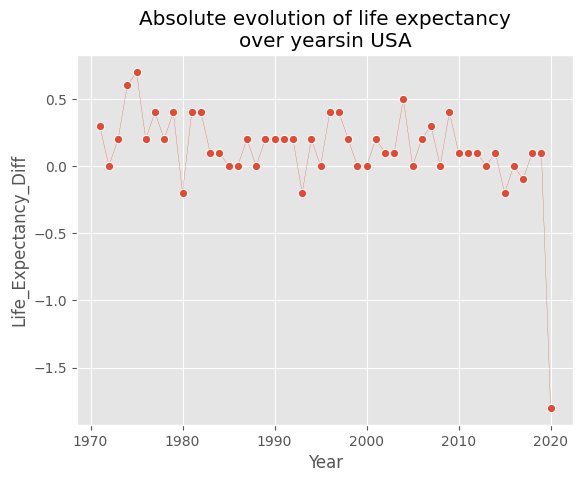

In [9]:
sns.lineplot(data=tmp_df_3, x="Year", y="Life_Expectancy_Diff", marker="o", linewidth=0.2)
plt.title("Absolute evolution of life expectancy\nover yearsin USA")
plt.show()

In [10]:
ttest_1samp(tmp_df_3["Life_Expectancy_Diff"], popmean=0.3)

TtestResult(statistic=np.float64(-3.7212105613188773), pvalue=np.float64(0.0005112013249193949), df=np.int64(49))

- L'√©cart entre la moyenne observ√©e et celle donn√©e par le politicien est d'environ 0.178 ans.
- La probabilit√© p = 0,000511 d'obtenir un √©cart au moins aussi important entre ces deux moyennes √©tant donn√© H0 est tr√®s faible.
- On a en effet 1 chance sur 1956 d'obtenir de tels r√©sultats ou pire si ce politicien a raison.
- La p-valeur de notre test est inf√©rieure √† notre seuil de 0,02.
- Nous rejettons donc l'hypoth√®se propos√©e.